----

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.utils import resample





# Se Cargan el Data set
df = pd.read_csv('/datasets/Churn.csv')

# Se inspeciona los datos de la dataframe
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [53]:
#valores nulos
df.isnull().sum()

# Verificar tipos de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [54]:
# Se Eliminan columnas irrelevantes
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Imputación de valores nulos con la media para las columnas n
df.fillna(df.mean(), inplace=True)

# Verificación después de la imputación
df.isnull().sum()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [55]:
# Codifico variables categoricas
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo convirtiendo los datos categóricos a numéricos.

</div>

In [56]:
X = df.drop(columns=['Exited'])  # Características
y = df['Exited']  # Etiqueta (variable objetivo)


In [57]:
# Ver el Equilibrio de clases
y.value_counts(normalize=True)



0    0.7963
1    0.2037
Name: Exited, dtype: float64

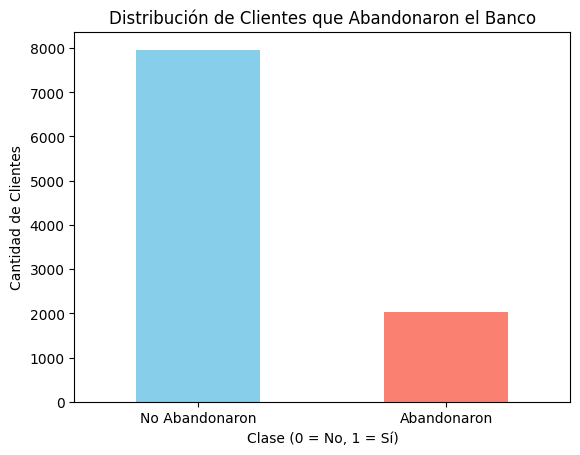

In [58]:
#Se crea grafica para visualizar datos

class_counts = df['Exited'].value_counts()

class_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Añadir títulos y etiquetas
plt.title('Distribución de Clientes que Abandonaron el Banco')
plt.xlabel('Clase (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')
plt.xticks(ticks=[0, 1], labels=['No Abandonaron', 'Abandonaron'], rotation=0)
plt.show()



In [59]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
#UNDERSAMPLING

# Concatenar los datos de entrenamiento para hacer el balanceo
train_data = pd.concat([X_train, y_train], axis=1)

# Separar clases mayoritaria y minoritaria
majority_class = train_data[train_data['Exited'] == 0]
minority_class = train_data[train_data['Exited'] == 1]

# Submuestrear la clase mayoritaria
majority_downsampled = resample(majority_class, 
                                replace=False,  # No hacer réplicas
                                n_samples=len(minority_class),  # Igualar tamano a la clase minoritaria
                                random_state=42)

# Combinar clases balanceadas
train_balanced = pd.concat([majority_downsampled, minority_class])

# Separar nuevamente X e y después del balanceo
X_train_balanced = train_balanced.drop(columns=['Exited'])
y_train_balanced = train_balanced['Exited']

print("Distribución de clases después del undersampling:\n", y_train_balanced.value_counts(normalize=True))


Distribución de clases después del undersampling:
 0    0.5
1    0.5
Name: Exited, dtype: float64


In [61]:
# Entrenamiento con regresión logistica con 'class_weight' balanceado
lr_class_weight = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_class_weight.fit(X_train, y_train)

# Realiza predicciones
y_pred_class_weight = lr_class_weight.predict(X_test)

# Calcular métricas de evaluacion
f1_class_weight = f1_score(y_test, y_pred_class_weight)
roc_auc_class_weight = roc_auc_score(y_test, lr_class_weight.predict_proba(X_test)[:, 1])

# Mostran los resultados
print(f'F1 Score con Logistic Regression (class_weight="balanced"): {f1_class_weight:.4f}')
print(f'AUC-ROC con Logistic Regression (class_weight="balanced"): {roc_auc_class_weight:.4f}')

# Matriz de confusión
conf_matrix_class_weight = confusion_matrix(y_test, y_pred_class_weight)
print('Matriz de confusión (class_weight="balanced"):\n', conf_matrix_class_weight)


F1 Score con Logistic Regression (class_weight="balanced"): 0.4195
AUC-ROC con Logistic Regression (class_weight="balanced"): 0.7179
Matriz de confusión (class_weight="balanced"):
 [[1028  579]
 [ 135  258]]


In [63]:
# MODEL 2: RandomForest con undersampling

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Evaluación
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f'F1 Score con RandomForest + Undersampling: {f1_rf:.4f}')
print(f'AUC-ROC con RandomForest + Undersampling: {roc_auc_rf:.4f}')
print('Matriz de Confusión:\n', confusion_matrix(y_test, y_pred_rf))
print('Reporte de Clasificación:\n', classification_report(y_test, y_pred_rf))

F1 Score con RandomForest + Undersampling: 0.5862
AUC-ROC con RandomForest + Undersampling: 0.8577
Matriz de Confusión:
 [[1274  333]
 [  92  301]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.79      0.86      1607
           1       0.47      0.77      0.59       393

    accuracy                           0.79      2000
   macro avg       0.70      0.78      0.72      2000
weighted avg       0.84      0.79      0.80      2000



Carge de los datos, se hizo limpieza de valores nulos, la codificación de las variables categoricas, y la eliminacion de columnas irrelevantes (como RowNumber, CustomerId, Surname).Variables categoricas: Como Geography y Gender, se transformaron en variables binarias utilizando One-Hot Encoding.

El equilibrio de las clases Utilicé el método value_counts() con su grafica para tener una amplia vizualisacion

Sí, utilicé el método train_test_split de sklearn para dividir los datos en un 80% de entrenamiento y un 20% de prueba, asegurándome de que la división fuera aleatoria y representativa de todo el conjunto de datos.


Trate de usarlo "SMOTe"imblearn  pero no me dejo mi pc ya revise eh instale y desintale pero no funciono para ver  que(clientes que abandonaron el banco). "ModuleNotFoundError: No module named 'imblearn'"



Entrenamiento, Validacion y Pruebas Finales del Modelo entrene el modelo utilizando el conjunto de entrenamiento y evalue su rendimiento en el conjunto de prueba, utilizando validacion cruzada.  0.576 significa que el modelo tiene un rendimiento moderado, es decir, hay un equilibrio entre la precisión y el recall,.  AUC de 0.859 indica que el modelo tiene una excelente capacidad para diferenciar entre las clases, muy cercana a 1. Esto sugiere que el modelo es capaz de identificar correctamente si una instancia pertenece a la clase positiva o negativa en la mayoría de los casos.